## EASY

- Построим прогноз для ауди


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/audi.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [4]:
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [7]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

train_r2 = r2_score(train_prediction, y_train)
test_r2 = r2_score(test_prediction, y_test)

print('R2 на обучающей выборке: ', train_r2)
print('R2 на тестовой выборке: ', test_r2)

R2 на обучающей выборке:  0.9972806673459388
R2 на тестовой выборке:  0.9066644423456005


Feature: year, Score: 0.23937
Feature: mileage, Score: 0.04955
Feature: tax, Score: 0.05322
Feature: mpg, Score: 0.46526
Feature: engineSize, Score: 0.19260


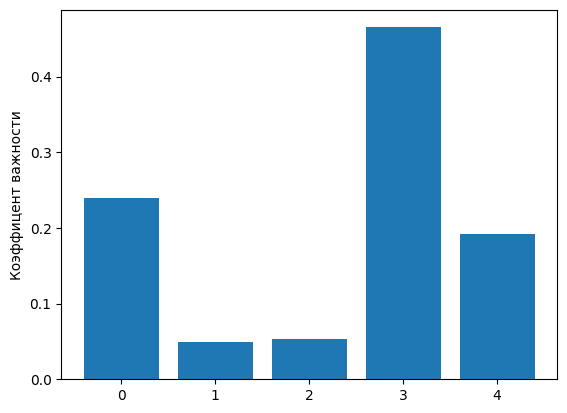

In [8]:
# Анализ признаков
features =['year', 'mileage', 'tax', 'mpg', 'engineSize'] 
forest_importances = pd.Series(model.feature_importances_, index=features)
for i,v in enumerate(forest_importances):
 print('Feature: %s, Score: %.5f' % (features[i],v))
# plot feature importance
plt.bar([x for x in range(len(forest_importances))], forest_importances)
plt.ylabel("Коэффицент важности")

plt.show()

#### Вывод:

-- самая важная фича - mpg

-- сама не важная фиса - tax - наверно можно строить дерево без нее, но лучше не надо, тк важность все же не ноль

## NORMAL


In [9]:
# Data preprocessing
brands = ['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']

In [10]:
# preprocessing ford and merc
data_ford = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/ford.csv')
data_focus = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/focus.csv')


In [11]:
data_ford['brand'] = '%s' % 'ford'
data_ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,ford
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,ford
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,ford


In [12]:
data_ford_final = pd.concat([data_ford,data_focus], ignore_index=True)

data_ford_final.to_csv('/Users/anastasiakucina/project/ML_course/data/archive/ford.csv', index=False)  

In [13]:
data_merc = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/merc.csv')
data_cclass = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/cclass.csv')

data_merc_final = pd.concat([data_merc,data_cclass], ignore_index=True)

data_merc_final.to_csv('/Users/anastasiakucina/project/ML_course/data/archive/merc.csv', index=False)  

In [14]:
# Meging + adding column 'brand'
data_full = pd.DataFrame(columns = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax','mpg', 'engineSize'])

for brand in brands:
    data_curr = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/%s.csv' % brand)
    if('tax(£)' in list(data_curr.columns)):
        data_curr.columns = data_curr.columns.str.replace('(£)', '')
    data_curr['brand'] = brand
    data_full = pd.concat([data_full, data_curr], ignore_index=False )

data_full.head()

/var/folders/gz/46_zg8xd6qqgn1sxylfq7g8m0000gn/T/ipykernel_2960/1106278773.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_full = pd.concat([data_full, data_curr], ignore_index=False )


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


In [15]:
#Preprocessing categorial -> numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_full['brand_encoder'] = labelencoder.fit_transform(data_full['brand'].values)
data_full['fuelType_encoder'] = labelencoder.fit_transform(data_full['fuelType'].values)
data_full['transmission_encoder'] = labelencoder.fit_transform(data_full['transmission'].values)
data_full['model_encoder'] = labelencoder.fit_transform(data_full['model'].values)
data_full['year'] = data_full['year'].astype(int)
data_full['price'] = data_full['price'].astype(int)
data_full['mileage'] = data_full['mileage'].astype(int)



In [16]:
data_full.dropna(inplace = True)

In [17]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99187 entries, 0 to 15156
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 99187 non-null  object 
 1   year                  99187 non-null  int64  
 2   price                 99187 non-null  int64  
 3   transmission          99187 non-null  object 
 4   mileage               99187 non-null  int64  
 5   fuelType              99187 non-null  object 
 6   tax                   99187 non-null  object 
 7   mpg                   99187 non-null  float64
 8   engineSize            99187 non-null  float64
 9   brand                 99187 non-null  object 
 10  brand_encoder         99187 non-null  int64  
 11  fuelType_encoder      99187 non-null  int64  
 12  transmission_encoder  99187 non-null  int64  
 13  model_encoder         99187 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 11.4+ MB


In [18]:
## trying different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

X = data_full[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'brand_encoder', 'fuelType_encoder', 'transmission_encoder', 'model_encoder']]
y = data_full['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'min_samples_leaf': [15, 5, 10],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [50, 15, 30]
}

search = GridSearchCV(RandomForestRegressor(), params)
search.fit(X_train, y_train)

train_prediction = search.predict(X_train)
test_prediction = search.predict(X_test)

train_r2 = r2_score(train_prediction, y_train)
test_r2 = r2_score(test_prediction, y_test)

print('R2 на обучающей выборке: ', train_r2)
print('R2 на тестовой выборке: ', test_r2)

R2 на обучающей выборке:  0.9692355765788102
R2 на тестовой выборке:  0.9417636648995297


In [19]:
pd.set_option('display.max_columns', 500)

In [20]:
## Analyzing params -- нет больших различий :)
res = pd.DataFrame(search.cv_results_)
res.filter(regex='^(?:mean|param)')

,mean_fit_time,mean_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,mean_test_score
0,9.118879,0.159068,squared_error,50,15,"{'criterion': 'squared_error', 'max_depth': 50...",0.933082
1,10.108824,0.205969,squared_error,50,5,"{'criterion': 'squared_error', 'max_depth': 50...",0.949089
2,9.399695,0.172975,squared_error,50,10,"{'criterion': 'squared_error', 'max_depth': 50...",0.941305
3,8.757152,0.144307,squared_error,15,15,"{'criterion': 'squared_error', 'max_depth': 15...",0.931536
4,9.503492,0.170598,squared_error,15,5,"{'criterion': 'squared_error', 'max_depth': 15...",0.947847
5,9.019930,0.152899,squared_error,15,10,"{'criterion': 'squared_error', 'max_depth': 15...",0.940345
6,8.972592,0.154654,squared_error,30,15,"{'criterion': 'squared_error', 'max_depth': 30...",0.933093
7,10.121653,0.206507,squared_error,30,5,"{'criterion': 'squared_error', 'max_depth': 30...",0.949344
8,9.454574,0.181589,squared_error,30,10,"{'criterion': 'squared_error', 'max_depth': 30...",0.941411
9,9.511381,0.169844,friedman_mse,50,15,"{'criterion': 'friedman_mse', 'max_depth': 50,...",0.933094
